# Project 1. Financial Analysis with Python

In financial analysis, it is a common practice to estimate or test claims on stocks' real mean return based on historical data called a sample. In this project, you will conduct statistical inference on the mean return of a stock of your choice. Please fill in your selection on [a Google sheet](https://docs.google.com/spreadsheets/d/15diyZL9XzbveSDpqZWtE01fMF5JJJ9AZrmbcvoVVRG8/edit?usp=sharing). Avoid repeating existing selections.

This project consists of three parts. In Part 1, you will retrieve the stock and the S&P 500 Index's 3-year historical data, compute their daily log returns, and visualize the returns' distributions. You will also use the historical data to compute the coefficient of correlation between the daily log returns of the stock and the S&P 500 Index, and then estimate the stock's Beta (a measure of a stock's volatility) under the assumption that the S&P 500 Index represents the market.     

In Part 2, you will use the historical data as a sample to build the 80 percent and 95 percent confidence intervals for the stock's (population) mean daily log return, respectively. Based on the confidence interval estimates, can you conclude that the (population) mean daily log return is positive?

In Part 3, you will use the historical data to test the claim that the stock generates a higher (or a lower) mean daily log return than the S&P 500 Index at the significant levels of 5% and 10%, respectively. What conclusions can be drawn? 

In both Part 2 and Part 3, the normal distribution can be applied to approximate the t-distribution. 

In [1]:
import lxml
import pandas as pd
from datetime import datetime
import pandas_datareader.data as web 
import numpy as np
from scipy.stats import norm
from scipy.stats import t

In [2]:
dis = web.DataReader('DIS', 'yahoo', start = '2019-01-01', 
                    end = datetime.today())
dis

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,109.139999,107.730003,108.099998,108.970001,9723500.0,107.654343
2019-01-03,108.650002,105.940002,108.480003,106.330002,10594700.0,105.046211
2019-01-04,110.750000,107.250000,107.940002,109.610001,10122800.0,108.286606
2019-01-07,111.400002,109.300003,109.910004,110.559998,6714700.0,109.225136
2019-01-08,112.559998,111.169998,111.800003,111.419998,8730700.0,110.074753
...,...,...,...,...,...,...
2022-11-25,99.809998,98.080002,98.809998,98.870003,6664300.0,98.870003
2022-11-28,99.129997,95.430000,98.209999,95.690002,13660000.0,95.690002
2022-11-29,96.430000,93.919998,96.000000,94.690002,13205300.0,94.690002


In [3]:
sp = web.DataReader('^GSPC', 'yahoo', start = '2019-01-01', 
                    end = datetime.today())
sp

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,2519.489990,2467.469971,2476.959961,2510.030029,3733160000,2510.030029
2019-01-03,2493.139893,2443.959961,2491.919922,2447.889893,3858830000,2447.889893
2019-01-04,2538.070068,2474.330078,2474.330078,2531.939941,4234140000,2531.939941
2019-01-07,2566.159912,2524.560059,2535.610107,2549.689941,4133120000,2549.689941
2019-01-08,2579.820068,2547.560059,2568.110107,2574.409912,4120060000,2574.409912
...,...,...,...,...,...,...
2022-11-25,4034.020020,4020.760010,4023.340088,4026.120117,1706460000,4026.120117
2022-11-28,4012.270020,3955.770020,4005.360107,3963.939941,3615430000,3963.939941
2022-11-29,3976.770020,3937.649902,3964.189941,3957.629883,3546040000,3957.629883


In [4]:
dis['LogR'] = np.log(dis['Close'].shift(-1) / dis['Close'])
dis.head()

,High,Low,Open,Close,Volume,Adj Close,LogR
Date,,,,,,,
2019-01-02,109.139999,107.730003,108.099998,108.970001,9723500.0,107.654343,-0.024525
2019-01-03,108.650002,105.940002,108.480003,106.330002,10594700.0,105.046211,0.030381
2019-01-04,110.750000,107.250000,107.940002,109.610001,10122800.0,108.286606,0.008630
2019-01-07,111.400002,109.300003,109.910004,110.559998,6714700.0,109.225136,0.007748
2019-01-08,112.559998,111.169998,111.800003,111.419998,8730700.0,110.074753,0.011156


In [5]:
sp['LogR'] = np.log(sp['Close'].shift(-1) / sp['Close'])
sp.head()

,High,Low,Open,Close,Volume,Adj Close,LogR
Date,,,,,,,
2019-01-02,2519.489990,2467.469971,2476.959961,2510.030029,3733160000,2510.030029,-0.025068
2019-01-03,2493.139893,2443.959961,2491.919922,2447.889893,3858830000,2447.889893,0.033759
2019-01-04,2538.070068,2474.330078,2474.330078,2531.939941,4234140000,2531.939941,0.006986
2019-01-07,2566.159912,2524.560059,2535.610107,2549.689941,4133120000,2549.689941,0.009649
2019-01-08,2579.820068,2547.560059,2568.110107,2574.409912,4120060000,2574.409912,0.004090


<AxesSubplot:>

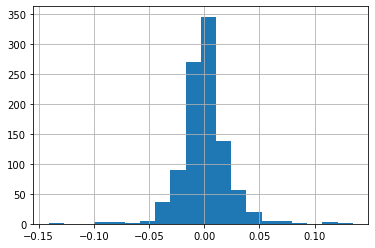

In [6]:
dis['LogR'].hist(bins = 20)

<AxesSubplot:>

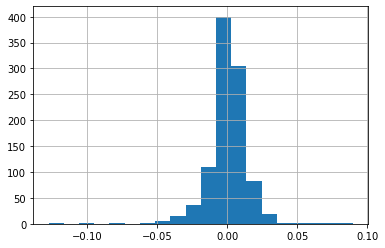

In [7]:
sp['LogR'].hist(bins = 20)

In [8]:
corr = sp['LogR'].corr(dis['LogR'])
corr

0.6877502954285428

In [9]:
sp_std = sp['LogR'].std()
dis_std = dis['LogR'].std()
dis_mean = dis['LogR'].mean()
sp_mean = sp['LogR'].mean()

In [10]:
dis_mean

-0.00011206188233833027

In [11]:
beta = corr*(dis_std/sp_std)
beta

1.0407054822513557

In [12]:
#80 confidence level
alpha = 0.2
n = len(dis)
tmul = t.ppf(1 - alpha / 2, n - 1)
xbar = dis_mean
s = dis_std

se = s / np.sqrt(n)

lcl = xbar - tmul * se
ucl = xbar + tmul * se
(lcl,ucl)



(-0.001010518637600461, 0.0007863948729238007)

In [13]:
#95 confidence interval
alpha = 0.05
n = len(dis)
tmul = t.ppf(1 - alpha / 2, n - 1)
xbar = dis_mean
s = dis_std

se = s / np.sqrt(n)

lcl = xbar - tmul * se
ucl = xbar + tmul * se
(lcl,ucl)



(-0.0014868991798257319, 0.0012627754151490712)

Based on the results of both confidence level tests, we cannot conclude that Disney's mean daily log return is positive because the lower confidence level is negative.

In [17]:
#5% significant level
alpha = 0.05
diff = dis['LogR'] - sp['LogR']
n = len(diff)
tmul = t.ppf(1 - alpha / 2, n - 1)
xbar = diff.mean()


se = diff.std() / np.sqrt(n)
tv = xbar / se
pv = t.cdf(tv,df = n - 1)

(tv,pv)

(-1.1834343483318517, 0.11846100269544901)

We fail to reject $H_O$, because the p-value is greater than ${\alpha} = 0.05 $

In [18]:
#10% significant level
alpha = 0.1
diff = dis['LogR'] - sp['LogR']
n = len(sp)
tmul = t.ppf(1 - alpha / 2, n - 1)
xbar = sp_mean


se = diff.std() / np.sqrt(n)
tv = xbar / se
pv = t.cdf(tv,df = n - 1)

(tv,pv)

(0.9632509764575284, 0.8321712392366207)

We fail to reject $H_O$, because the p-value is greater than ${\alpha} = 0.1 $